In [74]:
import pandas as pd
import sqlite3
import numpy as np
from datetime import datetime
import os
import logging
from pprint import pprint

import plotly.express as px
import plotly.graph_objects as go

import gym
import gym.spaces

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

logger = logging.getLogger(__name__)

import scipy.optimize as sco
from scipy import stats

Exception ignored in: <function Env.__del__ at 0x7f301c6e6d40>
Traceback (most recent call last):
  File "/home/mateusz/anaconda3/envs/pytorch/lib/python3.7/site-packages/gym/core.py", line 203, in __del__
    self.close()
  File "/home/mateusz/anaconda3/envs/pytorch/lib/python3.7/site-packages/gym/core.py", line 164, in close
    self.render(close=True)
  File "/tmp/ipykernel_13761/3590323441.py", line 146, in render
IndexError: list index out of range
Exception ignored in: <function Env.__del__ at 0x7f301c6e6d40>
Traceback (most recent call last):
  File "/home/mateusz/anaconda3/envs/pytorch/lib/python3.7/site-packages/gym/core.py", line 203, in __del__
    self.close()
  File "/home/mateusz/anaconda3/envs/pytorch/lib/python3.7/site-packages/gym/core.py", line 164, in close
    self.render(close=True)
  File "/tmp/ipykernel_13761/3590323441.py", line 146, in render
IndexError: list index out of range
Exception ignored in: <function Env.__del__ at 0x7f301c6e6d40>
Traceback (most recen

In [75]:
db_link ="/home/mateusz/Desktop/Moje_repo/My-Data-Science-repository/Stock_data_project/mWIG40/WIG40/WIG40/WIG.db"
conn = sqlite3.connect(db_link)

df = pd.read_sql('SELECT * FROM WIG',
            conn)

dates = [datetime.strptime(x, "%d-%m-%Y") for x in df["date"]]
df["date"] = dates

In [76]:
df.head()

,date,ticker,open,MAX,MIN,close,volume,trade
0,2022-09-09,MAGNA POLONIA SPOLKA AKCYJNA,2.870,2.945,2.800,2.925,12314.0,35158.0
1,2022-09-08,MAGNA POLONIA SPOLKA AKCYJNA,2.900,2.960,2.700,2.790,16723.0,46947.0
2,2022-09-07,MAGNA POLONIA SPOLKA AKCYJNA,2.985,2.985,2.820,2.950,8396.0,24485.0
3,2022-09-06,MAGNA POLONIA SPOLKA AKCYJNA,3.000,3.030,2.925,2.985,3054.0,8975.0
4,2022-09-05,MAGNA POLONIA SPOLKA AKCYJNA,2.960,3.070,2.950,3.070,2441.0,7334.0


In [77]:
df.ticker.unique()

array(['MAGNA POLONIA SPOLKA AKCYJNA', 'BENEFIT SYSTEMS SPOLKA AKCYJNA',
       'ELEKTROCIEPLOWNIA BĘDZIN SPOLKA AKCYJNA',
       'BUDIMEX SPOLKA AKCYJNA', 'BIG CHEESE STUDIO SPOLKA AKCYJNA',
       'BETACOM SPOLKA AKCYJNA', 'BOOMBIT SPOLKA AKCYJNA',
       'BBI DEVELOPMENT SPOLKA AKCYJNA',
       'BRITISH AUTOMOTIVE HOLDING SPOLKA AKCYJNA',
       'BRAND 24 SPOLKA AKCYJNA', 'AIRWAY MEDIX SPOLKA AKCYJNA',
       'GRUPA AZOTY SPOLKA AKCYJNA', 'ATLANTIS SE',
       'ATREM SPOLKA AKCYJNA', 'ATLANTA POLAND SPOLKA AKCYJNA',
       'ATM GRUPA SPOLKA AKCYJNA', 'ZUE SPOLKA AKCYJNA',
       'ZAKLAD BUDOWY MASZYN ZREMB-CHOJNICE SPOLKA AKCYJNA',
       'ZAMET INDUSTRY SPOLKA AKCYJNA',
       'ZESPOL ELEKTROWNI PĄTNOW-ADAMOW-KONIN SPOLKA AKCYJNA',
       'XTPL SPOLKA AKCYJNA',
       'X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA',
       'WARIMPEX FINANZ- UND BETEILIGUNGS AG', 'WAWEL SPOLKA AKCYJNA',
       'WITTCHEN SPOLKA AKCYJNA',
       'WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA', 'WOJAS SPOLKA 

# Multi Indexing DF

In [78]:
df.tail()

,date,ticker,open,MAX,MIN,close,volume,trade
135296,2021-02-15,11 BIT STUDIOS SPOLKA AKCYJNA,554.0,594.0,554.0,581.0,21524.0,12436601.0
135297,2021-02-12,11 BIT STUDIOS SPOLKA AKCYJNA,558.0,560.0,542.0,553.0,11073.0,6097394.0
135298,2021-02-11,11 BIT STUDIOS SPOLKA AKCYJNA,537.0,569.0,531.0,560.0,13911.0,7717254.0
135299,2021-02-10,11 BIT STUDIOS SPOLKA AKCYJNA,543.0,554.0,533.0,538.0,20906.0,11338501.0
135300,2021-02-09,11 BIT STUDIOS SPOLKA AKCYJNA,505.0,555.0,503.0,545.0,26628.0,14236186.0


In [79]:
df.loc[df["ticker"]==df.ticker.unique()[0]].set_index("date")

,ticker,open,MAX,MIN,close,volume,trade
date,,,,,,,
2022-09-09,MAGNA POLONIA SPOLKA AKCYJNA,2.870,2.945,2.800,2.925,12314.0,35158.0
2022-09-08,MAGNA POLONIA SPOLKA AKCYJNA,2.900,2.960,2.700,2.790,16723.0,46947.0
2022-09-07,MAGNA POLONIA SPOLKA AKCYJNA,2.985,2.985,2.820,2.950,8396.0,24485.0
2022-09-06,MAGNA POLONIA SPOLKA AKCYJNA,3.000,3.030,2.925,2.985,3054.0,8975.0
2022-09-05,MAGNA POLONIA SPOLKA AKCYJNA,2.960,3.070,2.950,3.070,2441.0,7334.0
...,...,...,...,...,...,...,...
2021-01-11,MAGNA POLONIA SPOLKA AKCYJNA,1.850,1.950,1.700,1.760,115159.0,212585.0
2021-01-08,MAGNA POLONIA SPOLKA AKCYJNA,1.710,1.880,1.710,1.840,226814.0,409430.0
2021-01-07,MAGNA POLONIA SPOLKA AKCYJNA,1.610,1.750,1.580,1.690,159824.0,266597.0


## Preselection of columns used for DL portfolio managment

In [80]:
df_list = []
for i in df.ticker.unique():
    df_x = df.loc[df["ticker"]==i] 
    df_x.name = i
    df_x=df_x.drop_duplicates()
    df_to_append=df_x.set_index("date")
    df_list.append(df_to_append[["ticker","open", "MAX", "MIN", "close", "trade"]])
    
df_list.sort(key=lambda x:len(x), reverse=True)
[(df.ticker.iloc[0],df.index[-1], df.index[0]) for df in df_list]

dfs1= [df for df in df_list if df.index.min()<datetime.strptime('01-03-2021', "%d-%m-%Y") and 
      df.index.max()>=datetime.strptime('08-09-2022', "%d-%m-%Y")]

#dfs1 = [df.loc[datetime.strptime('01-01-2019', "%d-%m-%Y"):datetime.strptime('19-02-2022', "%d-%m-%Y"), :] for df in dfs1]

index_list_lengh = [[len(df.index), df["ticker"].iloc[0]] for df in dfs1]
max_index = 0
max_count = 0
for index, value in enumerate(index_list_lengh):
    max_count_value = value[0]
    max_index_ = index
    if max_count_value>max_count:
        max_index = max_index_
        max_count = max_count_value

#mi = dfs1[max_index].index.copy()
#for i in range(len(dfs1)):
#    name = dfs1[i]["ticker"].iloc[0]
#    df_list[i]=dfs1[i].reindex(mi, method="pad")

keys = [df["ticker"].iloc[0] for df in dfs1]
dfs1 = [df.drop(columns=["ticker"]) for df in dfs1]

df3 = pd.concat(dfs1, axis=1, keys=keys, names=['Pair','Price'])
print('cropped from', len(df3))
t=max([min(df1.index) for df1 in dfs1])
df3=df3[df3.index>t]
print('to',len(df3))

df3 = df3.fillna(method="pad")
# replace rest
df3.replace(np.nan, 0, inplace=True)
# df.unstack()
df3=df3.astype(np.float32)

data=df3.drop(columns=['open','MIN','MAX', "trade"], axis=1, level=1)
data2 = data.loc[datetime.strptime('01-03-2021', "%d-%m-%Y"):datetime.strptime('09-08-2022', "%d-%m-%Y"), :]
data3 = data2.loc[:, (data2 != 0).any(axis=0)]


tickers = data3.columns.levels[0]

def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    return portfolio_std

def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result


mean_returns = data3.pct_change().mean().replace(np.inf, 0)
cov = data3.pct_change().cov().replace(np.inf, 0)
rf = 0.02
optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)
min_port_variance = min_variance(mean_returns, cov)

asset=[]
for i in range(pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=tickers).T.to_numpy().shape[1]):
    if pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=tickers).T.to_numpy().squeeze()[i] != 0:
        asset.append(data3.columns.levels[0][i])

for i in range(pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=tickers).T.to_numpy().shape[1]):
    if pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=tickers).T.to_numpy().squeeze()[i] != 0:
        asset.append(data3.columns.levels[0][i])

tickers = list(set(asset))
print(tickers)

cropped from 425
to 400
['VOTUM SPOLKA AKCYJNA', 'LIBET SPOLKA AKCYJNA', 'BUMECH SPOLKA AKCYJNA', 'OT LOGISTICS SPOLKA AKCYJNA', 'ASSECO BUSINESS SOLUTIONS SPOLKA AKCYJNA', 'GIELDA PAPIEROW WARTOŚCIOWYCH W WARSZAWIE SPOLKA AKCYJNA', 'INSTAL KRAKOW SPOLKA AKCYJNA', 'SUNEX SPOLKA AKCYJNA', 'ARTERIA SPOLKA AKCYJNA', 'ZAKLAD BUDOWY MASZYN ZREMB-CHOJNICE SPOLKA AKCYJNA', 'SYGNITY SPOLKA AKCYJNA', 'LENA LIGHTING SPOLKA AKCYJNA', 'DROZAPOL-PROFIL SPOLKA AKCYJNA', 'APLISENS SPOLKA AKCYJNA', 'BBI DEVELOPMENT SPOLKA AKCYJNA', 'COMP SPOLKA AKCYJNA', 'PROJPRZEM MAKRUM SPOLKA AKCYJNA', 'GI GROUP POLAND SPOLKA AKCYJNA', 'ZPUE SPOLKA AKCYJNA', 'FERRUM SPOLKA AKCYJNA', 'PROTEKTOR SPOLKA AKCYJNA', 'OEX SPOLKA AKCYJNA', 'ARCHICOM SPOLKA AKCYJNA', 'AC SPOLKA AKCYJNA', 'TALEX SPOLKA AKCYJNA', 'DIGITAL NETWORK SPOLKA AKCYJNA', 'SILVAIR, INC.', 'PRZEDSIĘBIORSTWO HYDRAULIKI SILOWEJ HYDROTOR S.A.', 'BOWIM SPOLKA AKCYJNA', 'MLP GROUP SPOLKA AKCYJNA', 'SOHO DEVELOPMENT SPOLKA AKCYJNA', 'VISTULA RETAIL GROUP SPO

In [81]:
len(tickers)

70

In [82]:
total_tickers = list(set(df.ticker.to_list()))
tickers_to_drop = [x for x in total_tickers if x not in tickers]
tickers_to_drop.sort()
not_to_remove = ['GRUPA AZOTY SPOLKA AKCYJNA', 'CIECH SPOLKA AKCYJNA', 'GRUPA KĘTY SPOLKA AKCYJNA', 'CD PROJEKT SPOLKA AKCYJNA', \
    'TAURON POLSKA ENERGIA SPOLKA AKCYJNA', 'GRUPA AZOTY ZAKLADY CHEMICZNE POLICE SPOLKA AKCYJNA',  'INDUSTRIAL MILK COMPANY S.A.', \
    'JASTRZĘBSKA SPOLKA WĘGLOWA SPOLKA AKCYJNA', 'TORPOL SPOLKA AKCYJNA',  'POLSKIE GORNICTWO NAFTOWE I GAZOWNICTWO SPOLKA AKCYJNA',  \
    'KGHM POLSKA MIEDŹ SPOLKA AKCYJNA',  'POLSKI KONCERN NAFTOWY ORLEN SPOLKA AKCYJNA',  'CCC SPOLKA AKCYJNA', 'ALUMETAL SPOLKA AKCYJNA',  \
    'PGF POLSKA GRUPA FOTOWOLTAICZNA SPOLKA AKCYJNA', 'PCC ROKITA SPOLKA AKCYJNA']

for i in not_to_remove:
    try:
        tickers_to_drop.remove(i)
    except ValueError:
        continue
    
tickers_to_drop

['11 BIT STUDIOS SPOLKA AKCYJNA',
 '3RGAMES SPOLKA AKCYJNA',
 'AB NOVATURAS',
 'AB SPOLKA AKCYJNA',
 'ACTION SPOLKA AKCYJNA',
 'ADIUVO INVESTMENTS SPOLKA AKCYJNA',
 'AGORA SPOLKA AKCYJNA',
 'AGROTON PUBLIC LIMITED',
 'AILLERON SPOLKA AKCYJNA',
 'AIRWAY MEDIX SPOLKA AKCYJNA',
 'ALIOR BANK SPOLKA AKCYJNA',
 'ALL IN! GAMES SPOLKA AKCYJNA',
 'ALLEGRO.EU SOCIÉTÉ ANONYME',
 'ALTA SPOLKA AKCYJNA',
 'ALTUS SPOLKA AKCYJNA',
 'AMBRA SPOLKA AKCYJNA',
 'AMICA WRONKI SPOLKA AKCYJNA',
 'AMREST HOLDINGS SE',
 'ANSWEAR.COM SPOLKA AKCYJNA',
 'APATOR SPOLKA AKCYJNA',
 'APS ENERGIA SPOLKA AKCYJNA',
 'ARTIFEX MUNDI SPOLKA AKCYJNA',
 'ASBISC ENTERPRISES PLC',
 'ASTARTA HOLDING N.V.',
 'ATAL SPOLKA AKCYJNA',
 'ATENDE SPOLKA AKCYJNA',
 'ATLANTIS SE',
 'ATM GRUPA SPOLKA AKCYJNA',
 'ATREM SPOLKA AKCYJNA',
 'AUTO PARTNER SPOLKA AKCYJNA',
 'BANCO SANTANDER S.A.',
 'BANK HANDLOWY W WARSZAWIE SPOLKA AKCYJNA',
 'BANK MILLENNIUM SPOLKA AKCYJNA',
 'BANK OCHRONY ŚRODOWISKA SPOLKA AKCYJNA',
 'BANK POLSKA KASA OPIEKI SP

In [83]:
df = df[~df['ticker'].isin(tickers_to_drop)]
df.tail()

,date,ticker,open,MAX,MIN,close,volume,trade
134787,2021-02-15,ASSECO BUSINESS SOLUTIONS SPOLKA AKCYJNA,39.0,39.4,38.6,39.2,4632.0,181121.0
134806,2021-02-12,ASSECO BUSINESS SOLUTIONS SPOLKA AKCYJNA,38.6,38.6,38.0,38.6,1055.0,40562.0
134826,2021-02-11,ASSECO BUSINESS SOLUTIONS SPOLKA AKCYJNA,38.6,38.6,38.0,38.4,794.0,30342.0
134846,2021-02-10,ASSECO BUSINESS SOLUTIONS SPOLKA AKCYJNA,38.0,38.2,37.8,38.2,626.0,23784.0
134866,2021-02-09,ASSECO BUSINESS SOLUTIONS SPOLKA AKCYJNA,38.2,38.2,37.6,38.0,1783.0,67315.0


In [84]:
df_list = []
for i in df.ticker.unique():
    df_x = df.loc[df["ticker"]==i] 
    df_x.name = i
    df_x=df_x.drop_duplicates()
    df_to_append=df_x.set_index("date")
    df_list.append(df_to_append[["ticker","open", "MAX", "MIN", "close", "trade"]])
    

In [85]:
df_list.sort(key=lambda x:len(x), reverse=True)
[(df.ticker.iloc[0],df.index[-1], df.index[0]) for df in df_list]

[('GRUPA AZOTY SPOLKA AKCYJNA',
  Timestamp('2021-01-04 00:00:00'),
  Timestamp('2022-09-09 00:00:00')),
 ('ZAKLAD BUDOWY MASZYN ZREMB-CHOJNICE SPOLKA AKCYJNA',
  Timestamp('2021-01-04 00:00:00'),
  Timestamp('2022-09-09 00:00:00')),
 ('WITTCHEN SPOLKA AKCYJNA',
  Timestamp('2021-01-04 00:00:00'),
  Timestamp('2022-09-09 00:00:00')),
 ('VISTULA RETAIL GROUP SPOLKA AKCYJNA',
  Timestamp('2021-01-04 00:00:00'),
  Timestamp('2022-09-09 00:00:00')),
 ('VOTUM SPOLKA AKCYJNA',
  Timestamp('2021-01-04 00:00:00'),
  Timestamp('2022-09-09 00:00:00')),
 ('TRANS POLONIA SPOLKA AKCYJNA',
  Timestamp('2021-01-04 00:00:00'),
  Timestamp('2022-09-09 00:00:00')),
 ('TAURON POLSKA ENERGIA SPOLKA AKCYJNA',
  Timestamp('2021-01-04 00:00:00'),
  Timestamp('2022-09-09 00:00:00')),
 ('TORPOL SPOLKA AKCYJNA',
  Timestamp('2021-01-04 00:00:00'),
  Timestamp('2022-09-09 00:00:00')),
 ('STALEXPORT AUTOSTRADY SPOLKA AKCYJNA',
  Timestamp('2021-01-04 00:00:00'),
  Timestamp('2022-09-09 00:00:00')),
 ('SUNEX SPOLK

In [86]:
dfs1= [df for df in df_list if df.index.min()<datetime.strptime('01-03-2021', "%d-%m-%Y") and df.index.max()>=datetime.strptime('08-09-2022', "%d-%m-%Y")]

In [87]:
index_list_lengh = [[len(df.index), df["ticker"].iloc[0]] for df in dfs1]
max_index = 0
max_count = 0
for index, value in enumerate(index_list_lengh):
    max_count_value = value[0]
    max_index_ = index
    if max_count_value>max_count:
        max_index = max_index_
        max_count = max_count_value

index_list_lengh

[[425, 'GRUPA AZOTY SPOLKA AKCYJNA'],
 [425, 'ZAKLAD BUDOWY MASZYN ZREMB-CHOJNICE SPOLKA AKCYJNA'],
 [425, 'WITTCHEN SPOLKA AKCYJNA'],
 [425, 'VISTULA RETAIL GROUP SPOLKA AKCYJNA'],
 [425, 'VOTUM SPOLKA AKCYJNA'],
 [425, 'TRANS POLONIA SPOLKA AKCYJNA'],
 [425, 'TAURON POLSKA ENERGIA SPOLKA AKCYJNA'],
 [425, 'TORPOL SPOLKA AKCYJNA'],
 [425, 'STALEXPORT AUTOSTRADY SPOLKA AKCYJNA'],
 [425, 'SUNEX SPOLKA AKCYJNA'],
 [425, 'SYGNITY SPOLKA AKCYJNA'],
 [425, 'PROTEKTOR SPOLKA AKCYJNA'],
 [425, 'PROCHEM SPOLKA AKCYJNA'],
 [425, 'POLSKI KONCERN NAFTOWY ORLEN SPOLKA AKCYJNA'],
 [425, 'PGF POLSKA GRUPA FOTOWOLTAICZNA SPOLKA AKCYJNA'],
 [425, 'POLSKIE GORNICTWO NAFTOWE I GAZOWNICTWO SPOLKA AKCYJNA'],
 [425, 'PCC ROKITA SPOLKA AKCYJNA'],
 [425, 'ORANGE POLSKA SPOLKA AKCYJNA'],
 [425, 'MENNICA POLSKA SPOLKA AKCYJNA'],
 [425, 'MLP GROUP SPOLKA AKCYJNA'],
 [425, 'LENA LIGHTING SPOLKA AKCYJNA'],
 [425, 'LUBAWA SPOLKA AKCYJNA'],
 [425, 'GRUPA KĘTY SPOLKA AKCYJNA'],
 [425, 'KGHM POLSKA MIEDŹ SPOLKA AKCYJ

In [88]:
dfs1[max_index].index.sort_values()

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-07', '2021-01-08',
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-18',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-05', '2022-09-06', '2022-09-07',
               '2022-09-08', '2022-09-09'],
              dtype='datetime64[ns]', name='date', length=425, freq=None)

In [89]:
mi = dfs1[max_index].index.sort_values().copy()
print(mi)
for i in range(len(dfs1)):
    name = dfs1[i]["ticker"].iloc[0]
    df_list[i]=dfs1[i].reindex(mi)#, method="pad")
    name


DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-07', '2021-01-08',
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-18',
               ...
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-05', '2022-09-06', '2022-09-07',
               '2022-09-08', '2022-09-09'],
              dtype='datetime64[ns]', name='date', length=425, freq=None)


In [90]:
keys = [df["ticker"].iloc[0] for df in dfs1]
dfs1 = [df.drop(columns=["ticker"]) for df in dfs1]


In [91]:
df3 = pd.concat(dfs1, axis=1, keys=keys, names=['Pair','Price'])
df3

Pair       GRUPA AZOTY SPOLKA AKCYJNA                                   \
Price                            open    MAX    MIN  close       trade   
date                                                                     
2021-01-04                      27.80  28.90  27.65  28.90   3947170.0   
2021-01-05                      29.00  29.85  28.50  28.70   7337356.0   
2021-01-07                      29.50  31.30  29.15  30.85  10902364.0   
2021-01-08                      31.25  32.45  30.10  30.25  12724531.0   
2021-01-11                      29.95  32.05  29.80  30.95   9025396.0   
...                               ...    ...    ...    ...         ...   
2022-09-05                      33.40  33.74  32.12  33.10   3516573.0   
2022-09-06                      33.00  34.58  32.66  34.40   3024737.0   
2022-09-07                      34.50  35.48  32.90  35.28   4226941.0   
2022-09-08                      35.70  35.76  34.16  34.68   2420801.0   
2022-09-09                      34.80  36.00  34.38  36.00   1709041.0   

Pair       ZAKLAD BUDOWY MASZYN ZREMB-CHOJNICE SPOLKA AKCYJNA                \
Price                                                    open    MAX    MIN   
date                                                                          
2021-01-04                                              0.725  0.780  0.700   
2021-01-05                                              0.765  0.775  0.735   
2021-01-07                                              0.735  0.770  0.730   
2021-01-08                                              0.730  0.780  0.705   
2021-01-11                                              0.765  0.775  0.735   
...                                                       ...    ...    ...   
2022-09-05                                              1.980  2.020  1.915   
2022-09-06                                              1.990  2.040  1.805   
2022-09-07                                              1.860  1.875  1.830   
2022-09-08                                              1.880  1.880  1.830   
2022-09-09                                              1.830  2.090  1.820   

Pair                         ... TATRY MOUNTAIN RESORTS. A.S.                \
Price       close     trade  ...                         open    MAX    MIN   
date                         ...                                              
2021-01-04  0.765   21340.0  ...                        142.0  142.0  142.0   
2021-01-05  0.770   12623.0  ...                        146.0  146.0  144.0   
2021-01-07  0.755   14039.0  ...                          NaN    NaN    NaN   
2021-01-08  0.775   42012.0  ...                        146.0  146.0  146.0   
2021-01-11  0.770   13500.0  ...                        141.0  154.0  141.0   
...           ...       ...  ...                          ...    ...    ...   
2022-09-05  1.990   19794.0  ...                          NaN    NaN    NaN   
2022-09-06  1.875   63813.0  ...                        146.0  146.0  146.0   
2022-09-07  1.860    8457.0  ...                        146.0  146.0  146.0   
2022-09-08  1.865   10650.0  ...                        149.9  150.0  149.9   
2022-09-09  1.990  236633.0  ...                          NaN    NaN    NaN   

Pair                       IMMOFINANZ AG                               
Price       close    trade          open    MAX    MIN  close   trade  
date                                                                   
2021-01-04  142.0   3550.0           NaN    NaN    NaN    NaN     NaN  
2021-01-05  144.0   5790.0         75.10  75.10  75.10  75.10   451.0  
2021-01-07    NaN      NaN         77.00  77.00  75.25  75.25  8026.0  
2021-01-08  146.0   3650.0           NaN    NaN    NaN    NaN     NaN  
2021-01-11  154.0  12512.0         76.90  77.60  76.90  77.60   698.0  
...           ...      ...           ...    ...    ...    ...     ...  
2022-09-05    NaN      NaN           NaN    NaN    NaN    NaN     NaN  
2022-09-06  146.0   2920.0   

In [92]:
print('cropped from', len(df3))
#t=max([min(df1.index) for df1 in dfs1])
#df3=df3[df3.index>t]
print('to',len(df3))

cropped from 425
to 425


In [93]:
df3.tail()

Pair       GRUPA AZOTY SPOLKA AKCYJNA                                  \
Price                            open    MAX    MIN  close      trade   
date                                                                    
2022-09-05                       33.4  33.74  32.12  33.10  3516573.0   
2022-09-06                       33.0  34.58  32.66  34.40  3024737.0   
2022-09-07                       34.5  35.48  32.90  35.28  4226941.0   
2022-09-08                       35.7  35.76  34.16  34.68  2420801.0   
2022-09-09                       34.8  36.00  34.38  36.00  1709041.0   

Pair       ZAKLAD BUDOWY MASZYN ZREMB-CHOJNICE SPOLKA AKCYJNA                \
Price                                                    open    MAX    MIN   
date                                                                          
2022-09-05                                               1.98  2.020  1.915   
2022-09-06                                               1.99  2.040  1.805   
2022-09-07                                               1.86  1.875  1.830   
2022-09-08                                               1.88  1.880  1.830   
2022-09-09                                               1.83  2.090  1.820   

Pair                         ... TATRY MOUNTAIN RESORTS. A.S.                \
Price       close     trade  ...                         open    MAX    MIN   
date                         ...                                              
2022-09-05  1.990   19794.0  ...                          NaN    NaN    NaN   
2022-09-06  1.875   63813.0  ...                        146.0  146.0  146.0   
2022-09-07  1.860    8457.0  ...                        146.0  146.0  146.0   
2022-09-08  1.865   10650.0  ...                        149.9  150.0  149.9   
2022-09-09  1.990  236633.0  ...                          NaN    NaN    NaN   

Pair                       IMMOFINANZ AG                               
Price       close    trade          open    MAX    MIN  close   trade  
date                                                                   
2022-09-05    NaN      NaN           NaN    NaN    NaN    NaN     NaN  
2022-09-06  146.0   2920.0           NaN    NaN    NaN    NaN     NaN  
2022-09-07  146.0   4380.0           NaN    NaN    NaN    NaN     NaN  
2022-09-08  150.0  13496.0           NaN    NaN    NaN    NaN     NaN  
2022-09-09    NaN      NaN         69.15  69.15  69.15  69.15  9474.0  

[5 rows x 430 columns]

In [94]:
# fill in na's
df3 = df3.fillna(method="pad")

# replace rest
df3.replace(np.nan, 0, inplace=True)
# df.unstack()
df3=df3.astype(np.float32)

df3.head()

Pair       GRUPA AZOTY SPOLKA AKCYJNA                                   \
Price                            open        MAX        MIN      close   
date                                                                     
2021-01-04                  27.799999  28.900000  27.650000  28.900000   
2021-01-05                  29.000000  29.850000  28.500000  28.700001   
2021-01-07                  29.500000  31.299999  29.150000  30.850000   
2021-01-08                  31.250000  32.450001  30.100000  30.250000   
2021-01-11                  29.950001  32.049999  29.799999  30.950001   

Pair                   ZAKLAD BUDOWY MASZYN ZREMB-CHOJNICE SPOLKA AKCYJNA  \
Price            trade                                               open   
date                                                                        
2021-01-04   3947170.0                                              0.725   
2021-01-05   7337356.0                                              0.765   
2021-01-07  10902364.0                                              0.735   
2021-01-08  12724531.0                                              0.730   
2021-01-11   9025396.0                                              0.765   

Pair                                      ... TATRY MOUNTAIN RESORTS. A.S.  \
Price         MAX    MIN  close    trade  ...                         open   
date                                      ...                                
2021-01-04  0.780  0.700  0.765  21340.0  ...                        142.0   
2021-01-05  0.775  0.735  0.770  12623.0  ...                        146.0   
2021-01-07  0.770  0.730  0.755  14039.0  ...                        146.0   
2021-01-08  0.780  0.705  0.775  42012.0  ...                        146.0   
2021-01-11  0.775  0.735  0.770  13500.0  ...                        141.0   

Pair                                     IMMOFINANZ AG                        \
Price         MAX    MIN  close    trade          open        MAX        MIN   
date                                                                           
2021-01-04  142.0  142.0  142.0   3550.0      0.000000   0.000000   0.000000   
2021-01-05  146.0  144.0  144.0   5790.0     75.099998  75.099998  75.099998   
2021-01-07  146.0  144.0  144.0   5790.0     77.000000  77.000000  75.250000   
2021-01-08  146.0  146.0  146.0   3650.0     77.000000  77.000000  75.250000   
2021-01-11  154.0  141.0  154.0  12512.0     76.900002  77.599998  76.900002   

Pair                           
Price           close   trade  
date                           
2021-01-04   0.000000     0.0  
2021-01-05  75.099998   451.0  
2021-01-07  75.250000  8026.0  
2021-01-08  75.250000  8026.0  
2021-01-11  77.599998   698.0  

[5 rows x 430 columns]

In [95]:
df3.tail()

Pair       GRUPA AZOTY SPOLKA AKCYJNA                                   \
Price                            open        MAX        MIN      close   
date                                                                     
2022-09-05                  33.400002  33.740002  32.119999  33.099998   
2022-09-06                  33.000000  34.580002  32.660000  34.400002   
2022-09-07                  34.500000  35.480000  32.900002  35.279999   
2022-09-08                  35.700001  35.759998  34.160000  34.680000   
2022-09-09                  34.799999  36.000000  34.380001  36.000000   

Pair                  ZAKLAD BUDOWY MASZYN ZREMB-CHOJNICE SPOLKA AKCYJNA  \
Price           trade                                               open   
date                                                                       
2022-09-05  3516573.0                                               1.98   
2022-09-06  3024737.0                                               1.99   
2022-09-07  4226941.0                                               1.86   
2022-09-08  2420801.0                                               1.88   
2022-09-09  1709041.0                                               1.83   

Pair                                       ... TATRY MOUNTAIN RESORTS. A.S.  \
Price         MAX    MIN  close     trade  ...                         open   
date                                       ...                                
2022-09-05  2.020  1.915  1.990   19794.0  ...                   147.000000   
2022-09-06  2.040  1.805  1.875   63813.0  ...                   146.000000   
2022-09-07  1.875  1.830  1.860    8457.0  ...                   146.000000   
2022-09-08  1.880  1.830  1.865   10650.0  ...                   149.899994   
2022-09-09  2.090  1.820  1.990  236633.0  ...                   149.899994   

Pair                                          IMMOFINANZ AG             \
Price         MAX         MIN  close    trade          open        MAX   
date                                                                     
2022-09-05  147.0  146.000000  146.0   7330.0     71.449997  71.449997   
2022-09-06  146.0  146.000000  146.0   2920.0     71.449997  71.449997   
2022-09-07  146.0  146.000000  146.0   4380.0     71.449997  71.449997   
2022-09-08  150.0  149.899994  150.0  13496.0     71.449997  71.449997   
2022-09-09  150.0  149.899994  150.0  13496.0     69.150002  69.150002   

Pair                                      
Price             MIN      close   trade  
date                                      
2022-09-05  71.449997  71.449997  1786.0  
2022-09-06  71.449997  71.449997  1786.0  
2022-09-07  71.449997  71.449997  1786.0  
2022-09-08  71.449997  71.449997  1786.0  
2022-09-09  69.150002  69.150002  9474.0  

[5 rows x 430 columns]

In [96]:
df_list_assets = df3.columns.levels[0].tolist()
df5 = df3

def ATR(df, column_level, look_back=14 ,min_column="MIN", max_column="MAX", close_column="close"):
        high_low = df[column_level, max_column] - df[column_level, min_column]
        high_close = np.abs(df[column_level, max_column] - df[column_level, close_column].shift())
        low_close = np.abs(df[column_level, min_column] - df[column_level, close_column].shift())
        ranges = pd.concat([high_low, high_close, low_close], axis=1)
        true_range = np.max(ranges, axis=1)
        df[i, "ATR"] = true_range.rolling(look_back).sum()/look_back
        df.sort_index()
        return df


for i in df_list_assets:
    close_delta = df5[i, "close"].diff(1).dropna()
    periods=14
    up = close_delta.clip(lower=0)
    down = -1*close_delta.clip(upper=0)
    ma_up = up.ewm(com=periods-1, adjust=True, min_periods=periods).mean()
    ma_down = down.ewm(com=periods-1, adjust=True, min_periods=periods).mean()
    rsi = ma_up/ma_down
    rsi = 100 - (100/(1+rsi))
    df5[i, "rsi"] = rsi
    df5 = df5.sort_index(axis=1)
df5.sort_index()
df5 = df5.fillna(method="backfill")

# replace rest
df5.replace(np.nan, 0, inplace=True)
# df.unstack()
df5=df5.astype(np.float32)

for i in df_list_assets:
    lookback = 14
    ATR(df5, i, lookback)
    df5 = df5.sort_index(axis=1)
    df5 = df5.fillna(method="backfill")
    #highh = df5[i, "MAX"].rolling(lookback).max()
    #lowl = df5[i, "MIN"].rolling(lookback).min()
    #df5[i, "CHOP"]= 100*np.log10((df5[i, "ATR"].rolling(lookback).sum()+1e-8) / (highh - lowl+1e-8)) / (np.log10(lookback+1e-8)+1e-8)


df5=df5.reindex(columns=["open", "MAX", "MIN", "close", "trade", "rsi", "ATR"], level='Price')



for i in df_list_assets:
    for y in ["open", "MAX", "MIN", "close", "trade", "rsi", "ATR"]:
        #df5[i, y] = df5[i, y].fillna(method="pad")
        df5[i, y] = df5[i, y].fillna(method="backfill")
        df5[i, y].replace([np.inf, -np.inf], np.nan)
        df5[i, y] = df5[i, y].fillna(method="backfill")
        #non+=df5[i, y].isna().sum()
#non
df5.tail(15)


Pair       AC SPOLKA AKCYJNA                                            \
Price                   open        MAX        MIN      close    trade   
date                                                                     
2022-08-22         22.900000  23.000000  22.900000  23.000000   8042.0   
2022-08-23         23.100000  23.100000  22.799999  22.900000  17909.0   
2022-08-24         22.799999  23.000000  22.799999  23.000000  14486.0   
2022-08-25         23.000000  23.100000  22.799999  22.799999  14154.0   
2022-08-26         22.799999  22.799999  22.799999  22.799999   2508.0   
2022-08-29         22.799999  23.000000  22.400000  23.000000  12400.0   
2022-08-30         22.500000  22.900000  22.500000  22.500000   2943.0   
2022-08-31         23.000000  23.000000  22.700001  22.700001   3214.0   
2022-09-01         23.000000  23.100000  22.500000  22.799999  22256.0   
2022-09-02         23.000000  23.000000  22.799999  23.000000   9053.0   
2022-09-05         22.799999  23.000000  22.799999  23.000000   4584.0   
2022-09-06         23.000000  23.000000  22.799999  22.799999   1834.0   
2022-09-07         22.700001  22.799999  22.500000  22.799999   4311.0   
2022-09-08         22.799999  22.799999  22.400000  22.400000  19615.0   
2022-09-09         22.600000  22.799999  22.100000  22.799999  30817.0   

Pair                            ALUMETAL SPOLKA AKCYJNA                        \
Price             rsi       ATR                    open        MAX        MIN   
date                                                                            
2022-08-22  42.168102  0.264286               69.500000  70.800003  69.500000   
2022-08-23  40.336613  0.221429               70.599998  70.800003  70.000000   
2022-08-24  43.002613  0.228572               70.900002  71.199997  69.699997   
2022-08-25  39.227280  0.228572               70.400002  71.400002  70.199997   
2022-08-26  39.227280  0.207144               70.300003  71.400002  70.300003   
2022-08-29  44.843292  0.228572               71.199997  71.199997  70.300003   
2022-08-30  35.909237  0.242858               70.300003  70.699997  69.699997   
2022-08-31  40.974876  0.264286               70.900002  70.900002  70.099998   
2022-09-01  43.384350  0.285715               70.199997  70.699997  70.099998   
2022-09-02  47.959927  0.292858               70.000000  70.500000  69.699997   
2022-09-05  47.959927  0.285715               70.000000  71.199997  70.000000   
2022-09-06  43.849876  0.292858               71.000000  71.000000  70.300003   
2022-09-07  43.849876  0.300000               70.199997  71.400002  70.199997   
2022-09-08  36.578850  0.321429               70.599998  71.400002  70.300003   
2022-09-09  46.188118  0.357143               71.400002  71.400002  70.099998   

Pair        ... ZPUE SPOLKA AKCYJNA                        ČEZ. A.S.  \
Price       ...               trade        rsi       ATR        open   
date        ...                                                        
2022-08-22  ...              9036.0  38.638313  7.357143  197.199997   
2022-08-23  ...              2710.0  38.638313  6.500000  198.000000   
2022-08-24  ...             27403.0  41.075752  6.500000  200.800003   
2022-08-25  ...               272.0  40.215580  5.714286  195.399994   
2022-08-26  ...             39727.0  41.534103  5.071429  195.000000   
2022-08-29  ...             12016.0  44.185421  4.428571  193.100006   
2022-08-30  ...             11774.0  43.132210  4.071429  192.800003   
2022-08-31  ...              8237.0  44.555458  3.500000  190.500000   
2022-09-01  ...            111126.0  41.222328  4.142857  188.000000   
2022-09-02  ...             13702.0  49.378735  4.285714  189.000000   
2022-09-05  ...             12197.0  48.178753  4.714286  180.199997   
2022-09-06  ...             60352.0  61.333858  5.214286  177.100006   
2022-09-07  ...             10005.0  56.574902  5.214286  176.300003   
2022-09-08  ...             11028.0  55.417244  5.714286

In [97]:
"""
asset_list2 = []
for i in df_list_assets:
    if df5[i, "CHOP"].max()==np.inf or df5[i, "ATR"].max()==np.inf:
        asset_list2.append(i)
asset_list2
df6 = df5 
df6 = df6.drop(asset_list2 , axis = 1)
df6
"""

'\nasset_list2 = []\nfor i in df_list_assets:\n    if df5[i, "CHOP"].max()==np.inf or df5[i, "ATR"].max()==np.inf:\n        asset_list2.append(i)\nasset_list2\ndf6 = df5 \ndf6 = df6.drop(asset_list2 , axis = 1)\ndf6\n'

In [98]:
"""asset_to_drop = []
for i in df6.columns.levels[0].tolist():
    if df6[i, "CHOP"].max()>200:
        print(f"Asset : {i}", df6[i, "CHOP"].max(), df6[i, "ATR"].max())
        asset_to_drop.append(i)
len(asset_to_drop)"""

'asset_to_drop = []\nfor i in df6.columns.levels[0].tolist():\n    if df6[i, "CHOP"].max()>200:\n        print(f"Asset : {i}", df6[i, "CHOP"].max(), df6[i, "ATR"].max())\n        asset_to_drop.append(i)\nlen(asset_to_drop)'

In [99]:
# split
df6=df5
test_split=0.15
c=int(len(df6.index)*test_split)
split_time = df6.index[-c]

df6 = df6.loc[datetime.strptime('01-03-2021', "%d-%m-%Y"):datetime.strptime('08-09-2022', "%d-%m-%Y"), :]
#df7 = df6.loc[datetime.strptime('01-01-2017', "%d-%m-%Y"):datetime.strptime('12-05-2022', "%d-%m-%Y"), :]

df_test = df6[df6.index>split_time]
df_train = df6[df6.index<=split_time]

df_test.to_csv(os.path.join(os.getcwd(), "test3_WIG_data.csv"))
df_train.to_csv(os.path.join(os.getcwd(), "train3_WIG_data.csv"), index=True)
df_train.to_hdf(os.path.join(os.getcwd(), "train3_WIG_data.h5"), key="df", mode="w")
df_test.to_hdf(os.path.join(os.getcwd(), "test3_WIG_data.h5"), key="df", mode="w")
#df7.to_hdf(os.path.join(os.getcwd(), "long_WIG_data.h5"), key="df", mode="w")

print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df6), 'cutoff_time:',split_time)


test#: 61 train#: 324 test_frac: 0.15844155844155844 cutoff_time: 2022-06-13 00:00:00


In [100]:
df_test.tail()

Pair       AC SPOLKA AKCYJNA                                            \
Price                   open        MAX        MIN      close    trade   
date                                                                     
2022-09-02         23.000000  23.000000  22.799999  23.000000   9053.0   
2022-09-05         22.799999  23.000000  22.799999  23.000000   4584.0   
2022-09-06         23.000000  23.000000  22.799999  22.799999   1834.0   
2022-09-07         22.700001  22.799999  22.500000  22.799999   4311.0   
2022-09-08         22.799999  22.799999  22.400000  22.400000  19615.0   

Pair                            ALUMETAL SPOLKA AKCYJNA                        \
Price             rsi       ATR                    open        MAX        MIN   
date                                                                            
2022-09-02  47.959927  0.292858               70.000000  70.500000  69.699997   
2022-09-05  47.959927  0.285715               70.000000  71.199997  70.000000   
2022-09-06  43.849876  0.292858               71.000000  71.000000  70.300003   
2022-09-07  43.849876  0.300000               70.199997  71.400002  70.199997   
2022-09-08  36.578850  0.321429               70.599998  71.400002  70.300003   

Pair        ... ZPUE SPOLKA AKCYJNA                        ČEZ. A.S.  \
Price       ...               trade        rsi       ATR        open   
date        ...                                                        
2022-09-02  ...             13702.0  49.378735  4.285714  189.000000   
2022-09-05  ...             12197.0  48.178753  4.714286  180.199997   
2022-09-06  ...             60352.0  61.333858  5.214286  177.100006   
2022-09-07  ...             10005.0  56.574902  5.214286  176.300003   
2022-09-08  ...             11028.0  55.417244  5.714286  181.699997   

Pair                                                                           
Price              MAX         MIN       close     trade        rsi       ATR  
date                                                                           
2022-09-02  189.000000  181.500000  183.399994  131165.0  34.673779  5.192858  
2022-09-05  180.199997  174.199997  177.000000  111020.0  30.556883  5.550001  
2022-09-06  177.100006  172.899994  172.899994   73044.0  28.243355  5.292859  
2022-09-07  185.699997  176.000000  184.500000   47996.0  41.693855  5.935716  
2022-09-08  188.100006  181.699997  186.800003   57680.0  43.937744  6.192859  

[5 rows x 602 columns]

In [101]:
asset_names = df_train.columns.levels[0].tolist()
features = df_train.columns.levels[1].tolist()
data = df_train.values.reshape(
    (len(df_train), len(asset_names), len(features)))
data = np.transpose(data, (1, 0, 2)) # transponse to: (Num Asset, len(df), Features)
times = df_train.index
price_columns = ["open", "MAX", "MIN", "close"]
non_price_columns = set(
    df_train.columns.levels[1]) - set(price_columns)


x = data.reshape((-1, len(features)))
stats = dict(mean=x.mean(0), std=x.std(0))


data_window = data[:, 50:50+50].copy()

y1 = data_window[:, -1, 3] / data_window[:, -2, 0] ##relative price vector (use close price)

data_window[:, -1, 3]
data_window[:, -2, 3]

y1 = np.concatenate([[1.0], y1])  # add cash price

print(data_window[0])

nb_pc = len(price_columns) #number of price columns
last_close_price = data_window[:, -1, 3] #get last close price

data_window[:, :, :nb_pc] /= last_close_price[:, np.newaxis, np.newaxis]
data_window[:, :, :nb_pc]
print(data_window[:, :, :nb_pc][0])

data_window[:, :, nb_pc:] -= stats["mean"][None, None, nb_pc:]
data_window[:, :, nb_pc:] /= stats["std"][None, None, nb_pc:]
data_window[:, :, nb_pc:] = np.clip(
    data_window[:, :, nb_pc:],
    stats["mean"][nb_pc:] - stats["std"][nb_pc:] * 10,
    stats["mean"][nb_pc:] + stats["std"][nb_pc:] * 10
)

data_window[:, :, nb_pc:][0]

high=data.shape[1] - 50 - 2
idx = np.random.randint(
                low=10 + 1, high=data.shape[1] - 50 - 2)
idx

[[3.82000008e+01 3.90000000e+01 3.82000008e+01 3.84000015e+01
  4.17280000e+04 6.70405655e+01 7.00000490e-01]
 [3.87000008e+01 3.90000000e+01 3.80999985e+01 3.90000000e+01
  6.06010000e+04 7.22423477e+01 7.07143511e-01]
 [3.90000000e+01 3.95000000e+01 3.87999992e+01 3.95000000e+01
  6.59760000e+04 7.56861038e+01 7.28572028e-01]
 [3.95000000e+01 3.95000000e+01 3.92999992e+01 3.94000015e+01
  7.37730000e+04 7.37163086e+01 7.21429007e-01]
 [3.92999992e+01 3.94000015e+01 3.89000015e+01 3.89000015e+01
  4.88310000e+04 6.46554184e+01 7.21429007e-01]
 [3.89000015e+01 3.94000015e+01 3.89000015e+01 3.94000015e+01
  3.98410000e+04 6.87870941e+01 6.64285932e-01]
 [3.95999985e+01 4.00000000e+01 3.95000000e+01 3.99000015e+01
  3.10676000e+05 7.22770996e+01 6.57142912e-01]
 [4.00000000e+01 4.00000000e+01 3.85999985e+01 3.90000000e+01
  1.63945000e+05 5.94019814e+01 7.28571756e-01]
 [3.89000015e+01 3.89000015e+01 3.85999985e+01 3.87999992e+01
  4.20550000e+04 5.69731712e+01 7.14285987e-01]
 [3.879999

200

In [102]:
def sharpe(returns, freq=30, rfr=0):
    """ Given a set of returns, calculates naive (rfr=0) sharpe (eq 28). """
    return (np.sqrt(freq) * np.mean(returns - rfr + 1e-8)) / np.std(returns - rfr + 1e-8)


def max_drawdown(returns):
    """ Max drawdown. See https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp """
    peak = returns.max()
    trough = returns[returns.argmax():].min()
    return (trough - peak) / (peak + 1e-8)

In [103]:
class DataProvider(object):
    """
    Acts as data provider to Enviroment
    https://github.com/wassname/rl-portfolio-management/blob/master/rl_portfolio_management/environments/portfolio.py
    """
    def __init__(self, df, steps=50, scale=True, scale_extra_cols=True, 
                 augment=0.001, window_lengh=50, random_reset=True):
        """
            df - csv for data frame index of timestamps
                and multi-index columns levels=[['LTCBTC'],...],['open','low','high','close',...]]
                an example is included as an hdf file in this repository
            steps - total steps in episode
            scale - scale the data for each episode
            scale_extra_cols - scale extra columns by global mean and std
            augment - fraction to augment the data by
            random_reset - reset to a random time (otherwise continue through time)
        """
        self.steps = steps + 1
        self.augment = augment
        self.random_reset = random_reset
        self.scale = scale
        self.scale_extra_cols = scale_extra_cols
        self.window_length = window_lengh
        self.idx = self.window_length
        
        #dataframe to matrix transfomration
        self.asset_names = df.columns.levels[0].tolist()
        self.features = df.columns.levels[1].tolist()
        data = df.values.reshape(
            (len(df), len(self.asset_names), len(self.features)))
        self._data = np.transpose(data, (1, 0, 2)) ## transponse to: (Num Asset, len(df), Features)
        self._times = df.index

        self.price_columns = ["open", "MAX", "MIN", "close"]
        self.non_price_columns = set(
            df.columns.levels[1]) - set(self.price_columns)
        
        if scale_extra_cols:
            x = self._data.reshape((-1, len(self.features)))
            self.stats = dict(mean=x.mean(0), std=x.std(0)) ## mean and std used for MIN/MAX scalling
        
        self.reset()

    def _step(self):
        """
        https://arxiv.org/pdf/1706.10059.pdf 
        """
        # get history matrix from dataframe
        data_window = self.data[:, self.step:self.step + self.window_length].copy()
        #print(f"Step: {self.step}, {self.step + self.window_length}")

        # (eq.1) prices
        y1 = data_window[:, -1, 3] / data_window[:, -2, 3] ## eq(1) get close price (column index 3)
        y1 = np.concatenate([[1.0], y1])  # add cash price

        # (eq 18) X: prices are divided by close price
        nb_pc = len(self.price_columns) #number of price columns -> 4
        
        if self.scale:
            last_close_price = data_window[:, -1, 0]
            data_window[:, :, :nb_pc] /= last_close_price[:, np.newaxis, np.newaxis] #divide by last close price in batch
        
        if self.scale_extra_cols:
            # normalize non price columns -> column "trade"
            data_window[:, :, nb_pc:] -= self.stats["mean"][None, None, nb_pc:]
            data_window[:, :, nb_pc:] /= self.stats["std"][None, None, nb_pc:]
            data_window[:, :, nb_pc:] = np.clip(
                data_window[:, :, nb_pc:],
                self.stats["mean"][nb_pc:] - self.stats["std"][nb_pc:] * 10,
                self.stats["mean"][nb_pc:] + self.stats["std"][nb_pc:] * 10
            )

        self.step += 1
        history = data_window
        done = bool(self.step >= self.steps)
        
        return history, y1, done
    
    def reset(self):
        
        self.step = 0
        
        # get data for this episode
        if self.random_reset: #get random period
            self.idx = np.random.randint(
                low=self.window_length + 1, high=self._data.shape[1] - self.steps - 2)
                #DATA must be in range -> we have to have no less then window lengh data points
                #end point index should be lower then len(df)-steps
        else:
            # continue sequentially, before reseting to start
            if self.idx>(self._data.shape[1] - self.steps - self.window_length - 1):
                self.idx=self.window_length + 1
            else:
                self.idx += self.steps
        data = self._data[:, self.idx -
                          self.window_length:self.idx + self.steps + 1].copy()
        self.times = self._times[self.idx -
                                 self.window_length:self.idx + self.steps + 1]

        # augment data to prevent overfitting
        data += np.random.normal(loc=0, scale=self.augment, size=data.shape)

        self.data = data
        
        
    

In [104]:
class PortfolioSim(object):
    """
    Portfolio management sim.
    Params:
    - cost e.g. 5 zl -> bank comission
    Based of [Jiang 2017](https://arxiv.org/abs/1706.10059)
    - time cost - cost for maintaining the traiding account
    """

    def __init__(self, asset_names=[], steps=50, traiding_cost=5, time_cost=0.0):
        self.traiding_cost = traiding_cost
        self.time_cost = time_cost
        self.steps = steps
        self.asset_names = asset_names
        self.eps = 1e-8
        self.reset()
    
    def _step(self, w1, y1):
        """
        Step.
        w1 - new action of portfolio weights - e.g. [0.1,0.9, 0.0]
        y1 - price relative vector also called return
            e.g. [1.0, 0.9, 1.1]
        Numbered equations are from https://arxiv.org/abs/1706.10059
        https://github.com/bassemfg/ddpg-rl-portfolio-management/blob/master/environment/portfolio.py
        """
        assert w1.shape == y1.shape, 'w1 and y1 must have the same shape'
        assert y1[0] == 1.0, 'y1[0] must be 1'
        
        w0 = self.w0
        p0 = self.p0
        # eq7
        dw1 = (y1 * w0) / (np.dot(y1, w0) + self.eps) # adding eps for avoiding divide by 0

        # (eq16) cost to change portfolio
        # (excluding change in cash [1:] to avoid double counting for transaction cost)
        c1 = self.traiding_cost  * (np.abs(dw1[1:] - w1[1:])).sum()
        assert c1 < 1.0, 'Cost is larger than current holding'
        
        p1 = p0 * (1 - c1) * np.dot(y1, w0)  # (eq11) final portfolio value
        p1 = p1 * (1 - self.time_cost) # add cost of holding assets
        #clipping -> cannot have negative holds of stocks
        p1 = np.clip(p1, 0, np.inf)
        rho1 = p1 / p0 - 1  # rate of returns
        r1 = np.log((p1 + self.eps) / (p0 + self.eps))  # (eq10) log rate of return
        # (eq22) immediate reward is log rate of return scaled by episode length
        reward = r1 / self.steps
        
        # remember for next step
        self.w0 = w1
        self.p0 = p1
        
        # if we run out of money, we're done
        done = bool(p1 == 0)
        
                # should only return single values, not list
        info = {
            "reward": reward,
            "log_return": r1,
            "portfolio_value": p1,
            "market_return": y1.mean(),
            "rate_of_return": rho1,
            "weights_mean": w1.mean(),
            "weights_std": w1.std(),
            "cost": c1
        }
        
        
        for i, name in enumerate(["CASH"] + self.asset_names):
            info['weight_' + name] = w1[i]
            info['price_' + name] = y1[i]

        self.infos.append(info)
        return reward, info, done
    
    
    def reset(self):
        self.infos = []
        self.w0 = np.array([1.0] + [0.0] * len(self.asset_names)) # 1.0 is a cash plaeceholder
        self.p0 = 1.0

In [105]:
class PortfolioEnv(gym.Env):
    """
    An environment for financial portfolio management.
    Financial portfolio management is the process of constant redistribution of a fund into different
    financial products.
    Based on [Jiang 2017](https://arxiv.org/abs/1706.10059)
    """

    metadata = {'render.modes': ['notebook', 'ansi']}
    
    def __init__(self,
                 df,
                 steps=50,
                 trading_cost=5,
                 time_cost=0.00,
                 window_length=50,
                 augment=0.001,
                 output_mode='mlp',
                 log_dir=None,
                 scale=True,
                 scale_extra_cols=True,
                 random_reset=True
                 ):
        

        """
        An environment for financial portfolio management.
        Params:
            df - csv for data frame index of timestamps
                 and multi-index columns levels=[[ASSET NAME],...],['open','low','high','close']]
            steps - steps in episode
            window_length - how many past observations["history"] to return
            trading_cost - cost of trade as a fraction -> 5zl
            time_cost - cost of holding as a fraction
            augment - fraction to randomly shift data by
            output_mode: decides observation["history"] shape
            - 'EIIE' for (assets, window, 3)
            - 'mlp' for (assets*window*3)
            log_dir: directory to save plots to
            scale - scales price data by last opening price on each episode (except return)
            scale_extra_cols - scales non price data using mean and std for whole dataset
        """
        self.src = DataProvider(df=df, steps=steps, scale=scale, scale_extra_cols=scale_extra_cols,
                           augment=augment, window_lengh=window_length,
                           random_reset=random_reset)
    
        self._plot = self._plot2 = self._plot3 = None
        self.output_mode = output_mode
        self.sim = PortfolioSim(
            asset_names=self.src.asset_names,
            traiding_cost=trading_cost,
            time_cost=time_cost,
            steps=steps)
        self.log_dir = log_dir
        self.eps = 1e-8

        # openai gym attributes
        # action will be the portfolio weights [cash_bias,w1,w2...] where wn are [0, 1] for each asset
        nb_assets = len(self.src.asset_names)
        self.action_space = gym.spaces.Box(0.0, 1.0, shape=(nb_assets + 1,))

        # get the history space from the data min and max
        if output_mode == 'EIIE':
            obs_shape = (
                nb_assets,
                window_length,
                len(self.src.features)
            )
            
        elif output_mode == 'mlp':
            obs_shape = (nb_assets) * window_length * \
                (len(self.src.features))
        else:
            raise Exception('Invalid value for output_mode: %s' %
                            self.output_mode)

        """self.observation_space = gym.spaces.Dict({
            'history': gym.spaces.Box(
                -10,
                20 if scale else 1,  # if scale=True observed price changes return could be large fractions
                (obs_shape,)
            ),
            'weights': self.action_space
        })"""
        
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(nb_assets, window_length,
                                                                                 df.shape[-1]))
        
        self.reset()
    
    def step(self, action):
        """
        Step the env.
        Actions should be portfolio [w0...]
        - Where wn is a portfolio weight between 0 and 1. The first (w0) is cash_bias
        - cn is the portfolio conversion weights see PortfolioSim._step for description
        """
        logger.debug('action: %s', action)

        weights = np.clip(action, 0.0, 1.0)
        weights /= weights.sum() + self.eps

        # Sanity checks
       # assert self.action_space.contains(
            #action), 'action should be within %r but is %r' % (self.action_space, action)
        np.testing.assert_almost_equal(
            np.sum(weights), 1.0, 3, err_msg='weights should sum to 1. action="%s"' % weights)

        history, y1, done1 = self.src._step()

        reward, info, done2 = self.sim._step(weights, y1)

        # calculate return for buy and hold a bit of each asset
        info['market_value'] = np.cumprod(
            [inf["market_return"] for inf in self.infos + [info]])[-1]
        # add dates
        info['date'] = self.src.times[self.src.step]
        info['steps'] = self.src.step

        self.infos.append(info)

        # reshape history according to output mode
        if self.output_mode == 'EIIE':
            pass
        elif self.output_mode == 'mlp':
            history = history.flatten()
        elif self.output_mode == None:
            pass
        
        self.weights_to_plot = weights
        
        return {'history': history, 'weights': weights}, reward, done1 or done2, info
       
    def reset(self):
        self.sim.reset()
        self.src.reset()
        self.infos = []
        action = self.sim.w0
        observation, reward, done, info = self.step(action)
        return observation
    
    def render(self, mode='ansi', close=False):
        # if close:
            # return
        if mode == 'ansi':
            pprint(self.infos[-1])
            return self.plot(), self.plot_weights()
            
    def plot(self):
        plt.figure()
        df_info = pd.DataFrame(self.infos)
        #df_info['date'] = pd.to_datetime(df_info['date'], format='%Y-%m-%d')
        df_info.set_index('date', inplace=True)
        mdd = max_drawdown(df_info.rate_of_return + 1)
        sharpe_ratio = sharpe(df_info.rate_of_return)
        title = 'max_drawdown={: 2.2%} sharpe_ratio={: 2.4f} mean_rate_of_return={: 2.4%} cost={: 2.4f}'.format(mdd, 
                                                                                                                sharpe_ratio,
                                                                                                                df_info.rate_of_return.mean()*100,
                                                                                                                df_info.cost.sum())
        #df_info[["portfolio_value", "market_value"]].plot(title=title, fig=plt.gcf(), rot=30)
        
        ones = [1 for i in range(len(df_info["portfolio_value"]))]
        df_info2 = df_info.copy()
        df_info2 = pd.concat([df_info2, pd.Series(data=ones, index=df_info2.index, name="Start Value")], axis=1)
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=df_info2.index, y=df_info2["market_value"],
                    mode='lines',
                    name='Market Value',
                    line = dict(color='firebrick')))
        fig.add_trace(go.Scatter(x=df_info2.index, y=df_info2["portfolio_value"],
                    mode='lines',
                    name='Portfolio Value',
                    line = dict(color='royalblue')))
        fig.add_trace(go.Scatter(x=df_info2.index, y=df_info2["Start Value"],
                    name='start value',
                    line = dict(color='grey', dash="dash", width=2)))
        fig.update_layout(title=title,
                   xaxis_title='Date',
                   yaxis_title='Normalized value')
        fig.show()
        
        
    def plot_weights(self):
        df_info = pd.DataFrame(self.infos)
        df_info.set_index('date', inplace=True)
        names = []
        full_names = []
        weights = self.weights_to_plot
        for i, name in enumerate(["CASH"] + self.src.asset_names):
            names.append(name[:5])
            full_names.append(name)
        """
        weight_array = np.array(weights)   
        explode_chunk_list = np.zeros(len(names))
        
        lowest_values = np.argsort(weight_array)[:10]
        
        for index in lowest_values:
            explode_chunk_list[index] = 0.2
        """
        
        data = {"Asset names" : names, "Weigths" : weights, "full_names": full_names}
        df_form_pie_chart = pd.DataFrame.from_dict(data)
        
        fig = px.pie(df_form_pie_chart, values="Weigths", names="Asset names", title="Asset Allocation Weights", 
                     hole=0.3, width=1000, height=1000, hover_data=["full_names"])
        fig.update_traces(textposition='inside', textinfo='percent+label')
        fig.show()
        
        
        
        

## Check enviroment

In [106]:
"""env = PortfolioEnv(
  df=df_train,
  steps=500,
  scale=False,
  augment=0.00,
  trading_cost=0.0025,
  time_cost=0.00,
  window_length=100,
  output_mode='EIIE'
)"""


"env = PortfolioEnv(\n  df=df_train,\n  steps=500,\n  scale=False,\n  augment=0.00,\n  trading_cost=0.0025,\n  time_cost=0.00,\n  window_length=100,\n  output_mode='EIIE'\n)"

In [107]:
"""steps = 1500
state = env.reset()
r = []
s = []
step_ = 0
old_portfolio_weights = state["weights"]
for _ in range(steps):
    # the action is an array with the new portfolio weights
    # for out action, let's change the weights by around a 20th each step
    action = old_portfolio_weights + np.random.normal(loc=0, scale=0.1, size=(29,))

    # clip and normalize since the portfolio weights should sum to one
    action = np.clip(action, 0, 1)
    action /= action.sum()

    observation, reward, done, info = env.step(action)
    #print(observation["history"].shape)
    date = info["date"]
    #print(f"Step: {_}, reward: {reward}, date: {date}")
    old_portfolio_weights = observation["weights"]
    
    step_ += 1
    r.append(reward)     
    s.append(step_)
    if done:
        break

# plot
env.render('ansi')"""

'steps = 1500\nstate = env.reset()\nr = []\ns = []\nstep_ = 0\nold_portfolio_weights = state["weights"]\nfor _ in range(steps):\n    # the action is an array with the new portfolio weights\n    # for out action, let\'s change the weights by around a 20th each step\n    action = old_portfolio_weights + np.random.normal(loc=0, scale=0.1, size=(29,))\n\n    # clip and normalize since the portfolio weights should sum to one\n    action = np.clip(action, 0, 1)\n    action /= action.sum()\n\n    observation, reward, done, info = env.step(action)\n    #print(observation["history"].shape)\n    date = info["date"]\n    #print(f"Step: {_}, reward: {reward}, date: {date}")\n    old_portfolio_weights = observation["weights"]\n    \n    step_ += 1\n    r.append(reward)     \n    s.append(step_)\n    if done:\n        break\n\n# plot\nenv.render(\'ansi\')'

In [108]:
import os
import torch as T 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.cuda.amp import GradScaler
from torch.cuda.amp import autocast



In [109]:
class OUActionNoise:
    def __init__(self, mu, sigma=0.15, theta = 0.2, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()
        
    def __call__(self):
        x = self.x_prev + self.theta*(self.mu-self.x_prev)*self.dt + \
            self.sigma*np.sqrt(self.dt)*np.random.normal(size=self.mu.shape)
            
        self.x_prev = x
        return x
    
    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)
        

class ReplayBuffer:
    def __init__(self, max_size, input_shape, n_actions):
        self.mem_size = max_size
        self.mem_cntr = 0
        self.state_memory= np.zeros((self.mem_size, *input_shape), dtype = np.float16)
        self.new_state_memory= np.zeros((self.mem_size, *input_shape), dtype = np.float16)
        self.action_memory= np.zeros((self.mem_size, n_actions), dtype = np.float16)
        self.reward_memory = np.zeros(self.mem_size, dtype = np.float16)
        self.terminal_memory = np.zeros(self.mem_size, dtype = np.int8)
        
    def store_transition(self,  state, action, reward, state_, done):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.new_state_memory[index] = state_["history"]
        self.terminal_memory[index]= 1-done
        self.mem_cntr +=1
        
    def sample_buffer(self, batch_size):
        max_memory = min(self.mem_cntr, self.mem_size)
        batch = np.random.choice(max_memory, batch_size)
        
        states = self.state_memory[batch]
        new_states = self.new_state_memory[batch]
        rewards = self.reward_memory[batch]
        actions = self.action_memory[batch]
        terminal = self.terminal_memory[batch]
        
        return states, new_states, rewards, actions, terminal

In [110]:
class ActorNetwork(nn.Module):
    def __init__(self, alpha, state_dim, name, chkpt_dir='tmp/ddpg'):   
        super(ActorNetwork, self).__init__()

        self.checkpoint_file = os.path.join(chkpt_dir, name+"_ddpg")
        
        # (28,100,5) -> (n_action, window, features)
        stride_time = state_dim[1] - 1 - 2 #
        features = state_dim[0]
        self.window = state_dim[1]
        self.n_data_features = state_dim[2]
        self.features_dims = features
        
        
        h0 = 2
        h1 = 30
        self.conv1 = nn.Conv2d(self.n_data_features, h0, (3, 1))
        self.conv2 = nn.Conv2d(h0, h1, (stride_time, 1), stride=(stride_time, 1))
        self.conv3 = nn.Conv2d((h1+1), 1, (1, 1))
        
        self.bn1 = nn.BatchNorm2d(h0)
        self.bn2 = nn.BatchNorm2d(h1+1)
        
        f1 = 1 / np.sqrt(self.conv1.weight.data.size()[0])
        f1 = np.float16(f1)
        T.nn.init.uniform_(self.conv1.weight.data, -f1, f1)
        T.nn.init.uniform_(self.conv1.bias.data, -f1,f1)

        
        f2 = 1 / np.sqrt(self.conv2.weight.data.size()[0])
        T.nn.init.uniform_(self.conv2.weight.data, -f2, f2)
        T.nn.init.uniform_(self.conv2.bias.data, -f2,f2)

        f3 = 0.003
        T.nn.init.uniform_(self.conv3.weight.data, -f3, f3)
        T.nn.init.uniform_(self.conv3.bias.data, -f3,f3)
        
        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.to(self.device)
        
    def forward(self, x):
        # var = var.view(1,5,100,28) -> (batch, features, window, n_action)
        # (28,100,5) -> (n_action, window, features)
        x = x.view(-1,self.n_data_features, self.window, self.features_dims)
        #x=x[None, :, :, :]
        w0 = x[:,:1,:1:] # weights from last step 
        x = x[:,:,1:,:]
          
        phi0 = F.relu(self.conv1(x))
        phi0 = self.bn1(phi0)
        phi1 = F.relu(self.conv2(phi0))
        h = T.cat([phi1,w0], 1)
        h = self.bn2(h)
        action = self.conv3(h)

        # add cash_bias before we softmax
        cash_bias_int = 0
        cash_bias = T.ones(action.size())[:,:,:,:1] * cash_bias_int
        action = T.cat([cash_bias.to(self.device), action], 3)

        batch_size = action.size()[0]
        action = action.view((batch_size,-1))

        action = F.softmax(action, dim=1)
        return action
    
    def predict(self, x, to_numpy=True):
        y = self.forward(x)
        if to_numpy:
            y = y.detach().cpu().numpy()
        return y
        
    def save_chekpoint(self):
        print("===== Saving Chekpoint =====")
        T.save(self.state_dict(), self.checkpoint_file)
        
    def load_chekpoint(self):
        print("===== Loading Chekpoint =====")
        self.load_state_dict(T.load(self.checkpoint_file))
        
class CriticNetwork(nn.Module):
    def __init__(self, alpha, state_dim, action_dim, name, chkpt_dir='tmp/ddpg'):   
        super(CriticNetwork, self).__init__()

        self.checkpoint_file = os.path.join(chkpt_dir, name+"_ddpg")
        
        # (28,100,5) -> (n_action, window, features)
        stride_time = state_dim[1] - 1 - 2 #
        features = state_dim[0]
        self.window = state_dim[1]
        self.n_data_features = state_dim[2]
        self.features_dims = features
        
        h0 = 2
        h1 = 30
        self.action = actions = action_dim.shape[0] -1
        
        self.conv1 = nn.Conv2d(self.n_data_features, h0, (3, 1))
        self.conv2 = nn.Conv2d(h0, h1, (stride_time,1), stride=(stride_time,1))
        self.layer3 = nn.Linear((h1+2)*actions, 1)
        
        self.bn1 = nn.BatchNorm2d(h0)
        self.bn2 = nn.BatchNorm2d(h1+2)
        
        f1 = 1 / np.sqrt(self.conv1.weight.data.size()[0])
        T.nn.init.uniform_(self.conv1.weight.data, -f1, f1)
        T.nn.init.uniform_(self.conv1.bias.data, -f1,f1)

        
        f2 = 1 / np.sqrt(self.conv2.weight.data.size()[0])
        T.nn.init.uniform_(self.conv2.weight.data, -f2, f2)
        T.nn.init.uniform_(self.conv2.bias.data, -f2,f2)

        f3 = 0.003
        T.nn.init.uniform_(self.layer3.weight.data, -f3, f3)
        T.nn.init.uniform_(self.layer3.bias.data, -f3,f3)
        
        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.to(self.device)
        
    def forward(self, x, action):
        # var = var.view(1,5,100,28) -> (batch, features, window, n_action)
        # (28,100,5) -> (n_action, window, features)
            x = x.view(-1, self.n_data_features, self.window, self.features_dims)
            #x=x[None, :, :, :]
            action = action[:, None, None, :-1]
            w0 = x[:,:1,:1,:] # weights from last step 
            x = x[:,:,1:,:]
       
            phi0 = F.relu(self.conv1(x))
            phi0 = self.bn1(phi0)
            phi1 = F.relu(self.conv2(phi0))
            h = T.cat([phi1,w0,action], 1)
            h = self.bn2(h)
            
            batch_size = x.size()[0]
            action = self.layer3(h.view((batch_size,-1)))
            return action
        
    def predict(self, x, action):
        return self.forward(x, action)
        
    def save_chekpoint(self):
        print("===== Saving Chekpoint =====")
        T.save(self.state_dict(), self.checkpoint_file)
        
    def load_chekpoint(self):
        print("===== Loading Chekpoint =====")
        self.load_state_dict(T.load(self.checkpoint_file))

In [111]:
class Agent:

    def __init__(self, alpha, beta, state_dim, action_dim, tau, gamma=0.99,
                 max_size=1000000, batch_size=64, l1_lambda=0):
        self.gamma =gamma
        self.alpha = alpha
        self.beta = beta
        self.n_actions = action_dim.shape[0]
        self.batch_size = batch_size
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.memory = ReplayBuffer(max_size, state_dim, self.n_actions)
        self.l1_lambda = l1_lambda
        
        self.actor = ActorNetwork(self.alpha, state_dim, chkpt_dir='tmp/ddpg', name="Actor")
        self.target_actor = ActorNetwork(self.alpha, state_dim, chkpt_dir='tmp/ddpg', name="target_Actor")

        self.critic = CriticNetwork(self.beta, state_dim, action_dim, chkpt_dir='tmp/ddpg', name="Critic")
        self.target_critic = CriticNetwork(self.beta, state_dim, action_dim, chkpt_dir='tmp/ddpg', name="target_Critic")
        
        self.noise = OUActionNoise(mu = np.zeros(self.n_actions))
        self.tau = tau
        
        self.scaler1 = GradScaler()
        self.scaler2 = GradScaler()
        
        self.update_network_parameters(tau=1)
        
    def choose_action(self, observation, eval=False):
        if not eval:
            self.actor.eval()
            observation = T.tensor(observation, dtype=T.float32).to(self.actor.device)
            mu = self.actor(observation).to(self.actor.device)
            mu_prime = mu + T.tensor(self.noise(), dtype=T.float32).to(self.actor.device)
            self.actor.train()
            #return mu_prime.cpu().detach().numpy()
            return mu_prime.detach().cpu().numpy()
        else:
            self.actor.eval()
            observation = T.tensor(observation, dtype=T.float32).to(self.actor.device)
            mu = self.actor(observation).to(self.actor.device)
            return mu.detach().cpu().numpy()

    def remember(self, state, action, reward, new_state, done):
        self.memory.store_transition(state, action, reward, new_state, done)
     
    def learn(self):
        if self.memory.mem_cntr < self.batch_size:
            return
        state,  new_state, reward, action, done = \
            self.memory.sample_buffer(self.batch_size)
        reward = T.tensor(reward, dtype=T.float32).to(self.critic.device)
        done = T.tensor(done, dtype=T.float32).to(self.critic.device)
        state = T.tensor(state, dtype=T.float32).to(self.critic.device)
        new_state = T.tensor(new_state, dtype=T.float32).to(self.critic.device) 
        action = T.tensor(action, dtype=T.float32).to(self.critic.device)
        
        self.target_actor.eval()
        self.target_critic.eval()
        self.critic.eval()
        
        target_actions = self.target_actor.forward(new_state)
        critic_value_ = self.target_critic.forward(new_state, target_actions)
        critic_value = self.critic.forward(state, action)
        
        target = []
        for j in range(self.batch_size):
            target.append(reward[j]+self.gamma*critic_value_[j]*done[j])
        target = T.tensor(target).to(self.critic.device)
        target = target.view(self.batch_size, 1)
        
        self.critic.train()
        self.critic.optimizer.zero_grad()
        l1 = 0
        for p in self.critic.parameters():
            l1 = l1 + p.abs().sum()
        with autocast():   
            critic_loss = F.mse_loss(target, critic_value)+self.l1_lambda*l1
        self.scaler1.scale(critic_loss).backward()
        self.scaler1.step(self.critic.optimizer)
        self.scaler1.update()
        
        self.critic.eval()
        self.actor.optimizer.zero_grad()
        
        mu = self.actor.forward(state)
        self.actor.train()
        l1 = 0
        for p in self.critic.parameters():
            l1 = l1 + p.abs().sum()
        with autocast():   
            actor_loss = -self.critic.forward(state, mu)
            actor_loss = T.mean(actor_loss)+self.l1_lambda*l1
            
        self.scaler2.scale(actor_loss).backward()
        self.scaler2.step(self.actor.optimizer)
        self.scaler2.update()
        
        
        #actor_loss.backward()
        #self.actor.optimizer.step()
        
        self.update_network_parameters()
        
    def update_network_parameters(self, tau=None):
        if tau is None:
            tau = self.tau
            critic_state_dict = self.critic.state_dict()
            actor_state_dict = self.actor.state_dict()
            target_actor_dict = self.target_actor.state_dict()
            target_critic_dict = self.target_critic.state_dict()
            
       
            for name in critic_state_dict:
                critic_state_dict[name] = tau*critic_state_dict[name].clone() + \
                    (1-tau)*target_critic_dict[name].clone()
                    
            self.target_critic.load_state_dict(critic_state_dict)
            
            for name in actor_state_dict:
                actor_state_dict[name] = tau*actor_state_dict[name].clone() + \
                    (1-tau)*target_actor_dict[name].clone()
            
            self.target_actor.load_state_dict(actor_state_dict)

            
    def save_model(self):
        self.actor.save_chekpoint()
        self.critic.save_chekpoint()
        self.target_actor.save_chekpoint()
        self.target_critic.save_chekpoint()
        
    def load_models(self):
        self.actor.load_chekpoint()
        self.critic.load_chekpoint()
        self.target_actor.load_chekpoint()
        self.target_critic.load_chekpoint()
    

In [112]:
env2 = PortfolioEnv(
  df=df_train,
  steps=265,
  scale=True,
  augment=0.005,
  trading_cost=0.0025,
  time_cost=0.00,
  window_length=50,
  output_mode='EIIE'
)

{'cost': 0.00019463819223623793,
 'date': Timestamp('2022-02-17 00:00:00'),
 'log_return': -0.002200715765180426,
 'market_return': 1.0023381450904032,
 'market_value': 1.2448398569852448,
 'portfolio_value': 1.1369484574802,
 'price_11 BIT STUDIOS SPOLKA AKCYJNA': 0.99808783806529,
 'price_AC SPOLKA AKCYJNA': 0.9964267490069084,
 'price_ALUMETAL SPOLKA AKCYJNA': 1.0203003857326602,
 'price_APLISENS SPOLKA AKCYJNA': 1.0304094580568572,
 'price_ARCHICOM SPOLKA AKCYJNA': 1.0239067904823251,
 'price_ARCTIC PAPER SPOLKA AKCYJNA': 1.0402369945064904,
 'price_ARTERIA SPOLKA AKCYJNA': 0.9998579853592864,
 'price_AS SILVANO FASHION GROUP': 0.9468800870563807,
 'price_ASSECO BUSINESS SOLUTIONS SPOLKA AKCYJNA': 1.007006620667314,
 'price_ASSECO POLAND SPOLKA AKCYJNA': 1.0160149573892985,
 'price_ASSECO SOUTH EASTERN EUROPE SPOLKA AKCYJNA': 1.0449236609147456,
 'price_ATLANTA POLAND SPOLKA AKCYJNA': 1.0006968177087507,
 'price_ATM GRUPA SPOLKA AKCYJNA': 1.0377589835685321,
 'price_BBI DEVELOPMENT

<Figure size 828x432 with 0 Axes>

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 15807), started 1:03:07 ago. (Use '!kill 15807' to kill it.)

/home/mateusz/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/home/mateusz/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



episode: 1, score: 0.000266, 100 games acg: 0.00026646303731192887 learning steps:265
episode: 2, score: 0.000355, 100 games acg: 0.00031052827815821404 learning steps:530
episode: 3, score: 0.000465, 100 games acg: 0.000362145644881841 learning steps:795
episode: 4, score: 0.000165, 100 games acg: 0.00031287715534245486 learning steps:1060
episode: 5, score: 0.000174, 100 games acg: 0.00028510346906390944 learning steps:1325
episode: 6, score: 0.000181, 100 games acg: 0.0002677351267886586 learning steps:1590
episode: 7, score: 0.000278, 100 games acg: 0.00026917455605476355 learning steps:1855
episode: 8, score: 0.000713, 100 games acg: 0.0003246352026384751 learning steps:2120
episode: 9, score: 0.000541, 100 games acg: 0.00034863732070890166 learning steps:2385
episode: 10, score: 0.000976, 100 games acg: 0.00041139020290472186 learning steps:2650
episode: 11, score: 0.000693, 100 games acg: 0.00043700028244289443 learning steps:2915
===== Saving Chekpoint =====
===== Saving Chekpo

<Figure size 828x432 with 0 Axes>

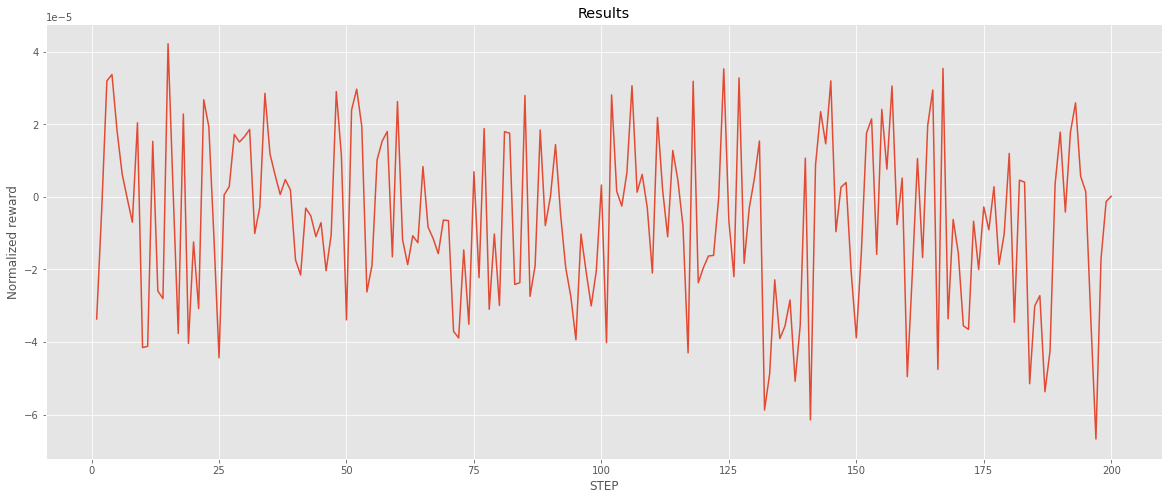

In [113]:
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
import psutil

T.backends.cudnn.benchmark = True

def weight_histograms_conv2d(writer, step, weights, layer_number):
  weights_shape = weights.shape
  num_kernels = weights_shape[0]
  for k in range(num_kernels):
    flattened_weights = weights[k].flatten()
    tag = f"layer_{layer_number}/kernel_{k}"
    writer.add_histogram(tag, flattened_weights, global_step=step, bins='tensorflow')


def weight_histograms_linear(writer, step, weights, layer_number):
  flattened_weights = weights.flatten()
  tag = f"layer_{layer_number}"
  writer.add_histogram(tag, flattened_weights, global_step=step, bins='tensorflow')


def weight_histograms(writer, step, model):
  print("Visualizing model weights...")
  # Iterate over all model layers
  i=1
  for layer in model.children():
    # Get layer
    # Compute weight histograms for appropriate layer
    if isinstance(layer, nn.Conv2d):
      weights = layer.weight
      weight_histograms_conv2d(writer, step, weights, i)
    elif isinstance(layer, nn.Linear):
      weights = layer.weight
      weight_histograms_linear(writer, step, weights, i)
      i+=1

state = env2.reset()
observation, reward, done, info = env2.step(state["weights"])

agent = Agent(alpha=0.001, 
              beta=0.001,
              state_dim = observation["history"].shape,
              action_dim= env2.action_space,
              tau=0.001,
              max_size=5000,
              batch_size=64,
              l1_lambda=0.005)

np.random.seed(5)

writer = SummaryWriter()
score_history = []

r = []
s = []
step_ = 0

#agent.load_models()
%load_ext tensorboard
%tensorboard --logdir runs

learning_steps = 0
for i in range(200):
    done = False
    score = 0
    obs = env2.reset()
    obs = obs["history"]
    while not done:
        act = agent.choose_action(obs)
        act = np.clip(act, 0, 1)
        act /= act.sum()
        act = act.reshape(-1)
        new_state, reward, done, info = env2.step(act)
        agent.remember(obs, act, reward, new_state, int(done))
        agent.learn()
        score += reward
        obs = new_state["history"]
        learning_steps+=1

    step_ += 1
    r.append(reward)     
    s.append(step_)
    writer.add_scalar("Reward" , np.mean(score_history[-100:]), global_step=step_) 
        
    score_history.append(score)
    print(f"episode: {i+1}, score: {round(score,6)}, 100 games acg: {np.mean(score_history[-100:])} learning steps:{learning_steps}")
    
    if i %10 ==0 and i!=0:
        agent.save_model()
        print(f"% of memory used: {psutil.virtual_memory().percent}%")
        print(f"% of available memory: {psutil.virtual_memory().available * 100 / psutil.virtual_memory().total}")   
        
weight_histograms(writer, step_, agent.actor)      

writer.close()
 
env2.render('ansi')
plt.figure(figsize=(20,8))
plt.xlabel("STEP")
plt.ylabel("Normalized reward")
plt.plot(s,r)
plt.title("Results")
plt.show()

#%load_ext tensorboard
#%reload_ext tensorboard




In [116]:
env_test = PortfolioEnv(
  df=df_test,
  steps=58,
  scale=True,
  trading_cost=0.0025,
  time_cost=0.00,
  window_length=50,
  output_mode='EIIE',
  random_reset=False
)


done = False
obs = env_test.reset()
obs = obs["history"]
#print(obs.shape)
step_test = 1
while not done:
  print(f"Test step: {step_test}")
  step_test += 1
  #act = agent.actor.forward(obs[np.newaxis, :])
  act = agent.choose_action(obs, eval=True)
  act = np.clip(act, 0, 1)
  act /= act.sum()
  act = act.reshape(-1)
  new_state, reward, done, info = env_test.step(act)
#prediction = agent.actor.predict(obs, act)
  #obs = new_state["history"]
  print(obs.shape)

env_test.render('ansi')

{'cost': 3.612604230271971e-06,
 'date': Timestamp('2022-09-08 00:00:00'),
 'log_return': 0.00556098835155162,
 'market_return': 1.0058978763847708,
 'market_value': 1.2900775045647093,
 'portfolio_value': 1.3004769475551021,
 'price_AC SPOLKA AKCYJNA': 0.9824519337913356,
 'price_ALUMETAL SPOLKA AKCYJNA': 1.0000129359546317,
 'price_APLISENS SPOLKA AKCYJNA': 1.0000157876680977,
 'price_ARCHICOM SPOLKA AKCYJNA': 1.005499943369214,
 'price_ARCTIC PAPER SPOLKA AKCYJNA': 1.0759246127057889,
 'price_ARTERIA SPOLKA AKCYJNA': 0.9708593227700743,
 'price_AS SILVANO FASHION GROUP': 0.9813358244347009,
 'price_ASSECO BUSINESS SOLUTIONS SPOLKA AKCYJNA': 1.0081096661852509,
 'price_ASSECO POLAND SPOLKA AKCYJNA': 0.9916198997997938,
 'price_ASSECO SOUTH EASTERN EUROPE SPOLKA AKCYJNA': 1.02423298288962,
 'price_ATLANTA POLAND SPOLKA AKCYJNA': 1.0338808025487938,
 'price_BBI DEVELOPMENT SPOLKA AKCYJNA': 0.9556056613985293,
 'price_BETACOM SPOLKA AKCYJNA': 1.040148140823559,
 'price_BORYSZEW SPOLKA A

Test step: 1
(86, 50, 7)
Test step: 2
(86, 50, 7)
Test step: 3
(86, 50, 7)
Test step: 4
(86, 50, 7)
Test step: 5
(86, 50, 7)
Test step: 6
(86, 50, 7)
Test step: 7
(86, 50, 7)
Test step: 8
(86, 50, 7)
Test step: 9
(86, 50, 7)
Test step: 10
(86, 50, 7)
Test step: 11
(86, 50, 7)
Test step: 12
(86, 50, 7)
Test step: 13
(86, 50, 7)
Test step: 14
(86, 50, 7)
Test step: 15
(86, 50, 7)
Test step: 16
(86, 50, 7)
Test step: 17
(86, 50, 7)
Test step: 18
(86, 50, 7)
Test step: 19
(86, 50, 7)
Test step: 20
(86, 50, 7)
Test step: 21
(86, 50, 7)
Test step: 22
(86, 50, 7)
Test step: 23
(86, 50, 7)
Test step: 24
(86, 50, 7)
Test step: 25
(86, 50, 7)
Test step: 26
(86, 50, 7)
Test step: 27
(86, 50, 7)
Test step: 28
(86, 50, 7)
Test step: 29
(86, 50, 7)
Test step: 30
(86, 50, 7)
Test step: 31
(86, 50, 7)
Test step: 32
(86, 50, 7)
Test step: 33
(86, 50, 7)
Test step: 34
(86, 50, 7)
Test step: 35
(86, 50, 7)
Test step: 36
(86, 50, 7)
Test step: 37
(86, 50, 7)
Test step: 38
(86, 50, 7)
Test step: 39
(86, 50

(None, None)

<Figure size 828x432 with 0 Axes>

<Figure size 828x432 with 0 Axes>